In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Importing the dataset
df = pd.read_csv('vehicle.csv')

In [4]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
# saving target column as other dataframe
target = df['class']

In [6]:
target.value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [7]:
# The above target value distribution indicates, the data is evenly distributedd consdering the fact that there are 2 inds of cars within the label 'car' itself
# hence No skewness in the target column

In [8]:
df.drop('class',axis=1,inplace=True)

In [9]:
# the data type of every columns so as to get a better understanding of how to deal with this data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [10]:
# firstly checking for missing values
df.isna().any()

compactness                    False
circularity                     True
distance_circularity            True
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio        False
scatter_ratio                   True
elongatedness                   True
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration       True
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2                True
hollows_ratio                  False
dtype: bool

In [11]:
col_mean = {}
for col in df.columns:
#     print df[col].mean()
    col_mean[col] = df[col].mean()
print col_mean

{'skewness_about.2': 188.91952662721894, 'circularity': 44.828775267538646, 'elongatedness': 40.933727810650886, 'skewness_about.1': 12.602366863905326, 'scaled_radius_of_gyration': 174.70971563981044, 'pr.axis_aspect_ratio': 61.67890995260664, 'pr.axis_rectangularity': 20.582443653618032, 'max.length_aspect_ratio': 8.567375886524824, 'hollows_ratio': 195.63238770685578, 'scaled_variance.1': 439.49407582938386, 'compactness': 93.67848699763593, 'radius_ratio': 168.88809523809525, 'scaled_variance': 188.63107947805457, 'distance_circularity': 82.1104513064133, 'max.length_rectangularity': 147.99881796690306, 'skewness_about': 6.364285714285714, 'scaled_radius_of_gyration.1': 72.44774346793349, 'scatter_ratio': 168.901775147929}


In [12]:
df.fillna(value=col_mean,inplace=True)

In [13]:
df.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
dtype: bool

In [14]:
#-----Hence missing values are now replaced with the mean of their respective columns

In [15]:
df.columns

Index([u'compactness', u'circularity', u'distance_circularity',
       u'radius_ratio', u'pr.axis_aspect_ratio', u'max.length_aspect_ratio',
       u'scatter_ratio', u'elongatedness', u'pr.axis_rectangularity',
       u'max.length_rectangularity', u'scaled_variance', u'scaled_variance.1',
       u'scaled_radius_of_gyration', u'scaled_radius_of_gyration.1',
       u'skewness_about', u'skewness_about.1', u'skewness_about.2',
       u'hollows_ratio'],
      dtype='object')

In [16]:
df.shape

(846, 18)

## Understanding data

In [17]:
stat = df.describe().transpose()
stat.drop(['count','min','max'],inplace=True,axis=1)
stat

,mean,std,25%,50%,75%
compactness,93.678487,8.234474,87.00,93.0,100.00
circularity,44.828775,6.133943,40.00,44.0,49.00
distance_circularity,82.110451,15.740902,70.00,80.0,98.00
radius_ratio,168.888095,33.400979,141.00,168.0,195.00
pr.axis_aspect_ratio,61.678910,7.882119,57.00,61.0,65.00
max.length_aspect_ratio,8.567376,4.601217,7.00,8.0,10.00
scatter_ratio,168.901775,33.195188,147.00,157.0,198.00
elongatedness,40.933728,7.811559,33.00,43.0,46.00
pr.axis_rectangularity,20.582444,2.588326,19.00,20.0,23.00
max.length_rectangularity,147.998818,14.515652,137.00,146.0,159.00


In [18]:
# But to ease this obsevation
# Looking for only those features where there is skewnwess in the data
# considering only those columns that have more than or equal to 1 unit difference between their  mean and median
stat[abs(stat['mean']-stat['50%'])>=1]

,mean,std,25%,50%,75%
distance_circularity,82.110451,15.740902,70.00,80.0,98.00
scatter_ratio,168.901775,33.195188,147.00,157.0,198.00
elongatedness,40.933728,7.811559,33.00,43.0,46.00
max.length_rectangularity,147.998818,14.515652,137.00,146.0,159.00
scaled_variance,188.631079,31.355195,167.00,179.0,217.00
scaled_variance.1,439.494076,176.457706,318.25,364.0,586.75
skewness_about.1,12.602367,8.930792,5.00,11.0,19.00
hollows_ratio,195.632388,7.438797,190.25,197.0,201.00


In [19]:
## Finding the count of outliers in each column

In [20]:
IQR = stat['75%'] - stat['25%'] 
((df< (stat['25%']-1.5*IQR)) | (df >(stat['75%']+1.5*IQR))).sum()

compactness                     0
circularity                     0
distance_circularity            0
radius_ratio                    3
pr.axis_aspect_ratio            8
max.length_aspect_ratio        13
scatter_ratio                   0
elongatedness                   0
pr.axis_rectangularity          0
max.length_rectangularity       0
scaled_variance                 1
scaled_variance.1               2
scaled_radius_of_gyration       0
scaled_radius_of_gyration.1    15
skewness_about                 12
skewness_about.1                1
skewness_about.2                0
hollows_ratio                   0
dtype: int64

In [21]:
## Since its not logical enought to build box plot of every column one by one. using pandas boxplot rather than seaborn's

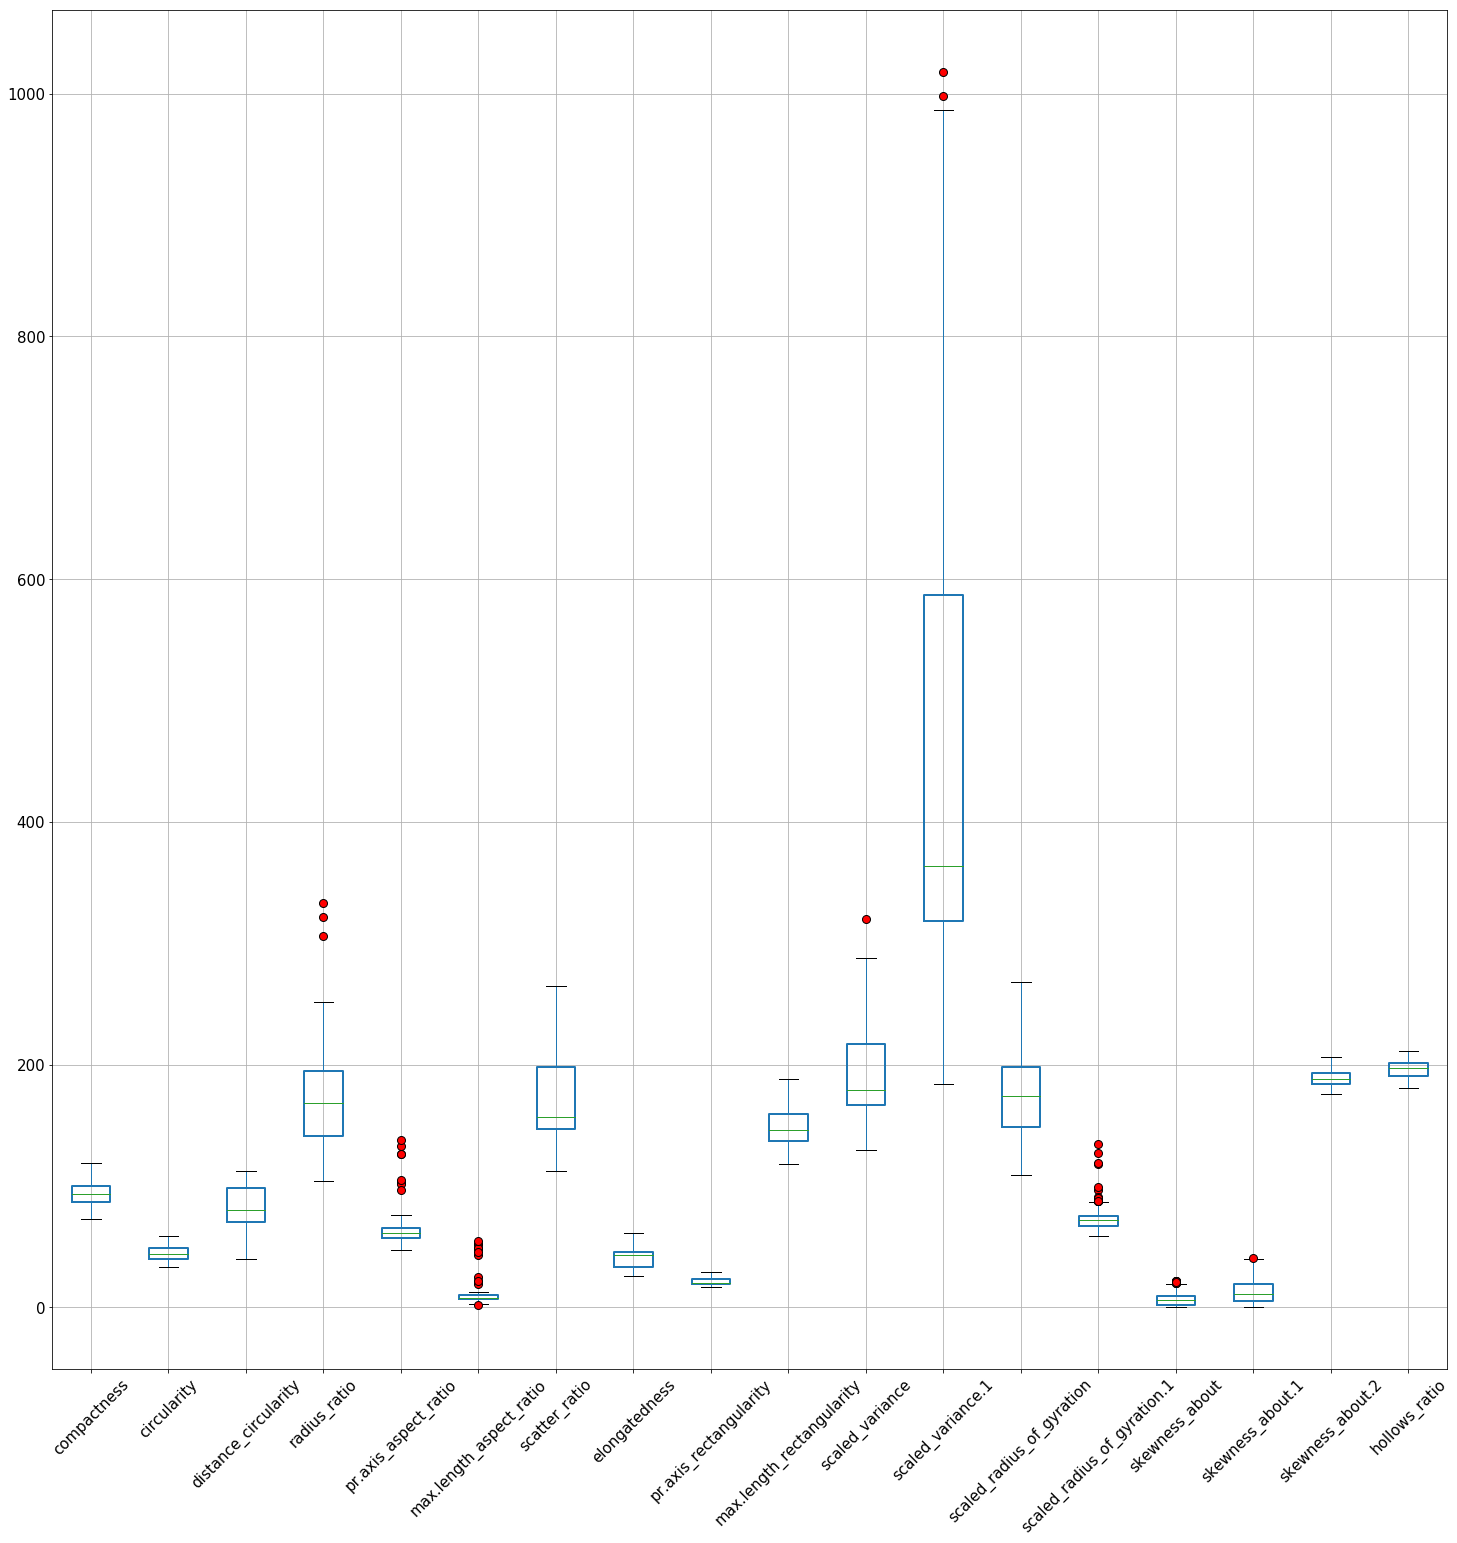

In [22]:
# plt.figure(figsize=(50,20),)
flierprops = {"marker":"o", "markerfacecolor":"r","markersize":"8"}
bx = df.boxplot(figsize=(25,25),rot=45,fontsize=15,flierprops=flierprops,boxprops={"linewidth":"2"})

#### We can clearly see here that the columns with clear outliers are
 - radius_ratio
 - pr.axis_aspect_ratio
 - max.length_aspect_ratio
 - scaled_variance
 - scaled_variance.1
 - scaled_radius_of_gyration.1
 - skewness_about
 - skewness_about.1

#### Observations from the EDA

 1. Out of 18 feaures provided, 8 of them have outliers while majority of them don't have outliers
 2. Out of all the independent variables. roughly 3-4 columns have huge skewness in them. Most of them have like ~2-3 units difference between thier mean and median.
 3. Out of the all the 8 columns that have outliers and those columns that have skewness or their standard deviation is large, there is no such pattern that can support the fact that because of skewness or high standard deviation this column has outliers. This indicates that while outliers may be because of skewness or high Std but low skewness and Std does not neccessarily mean it cannot have outliers(eg. pr.axis_aspect_ratio has low std in comparison to others but still has outliers)
 4. There are columns like aspect_ratio and elongatedness that have huge skewness yet they don't have any outliers
 
 ##### Note : All the observations below are as per the fact that the missing values were replaced by thier respective means. However, treatment of missing values should not be affecting the presence of outliers or skewness as the missing peice of information can anyway not contribute anything

### Understanding the attributes

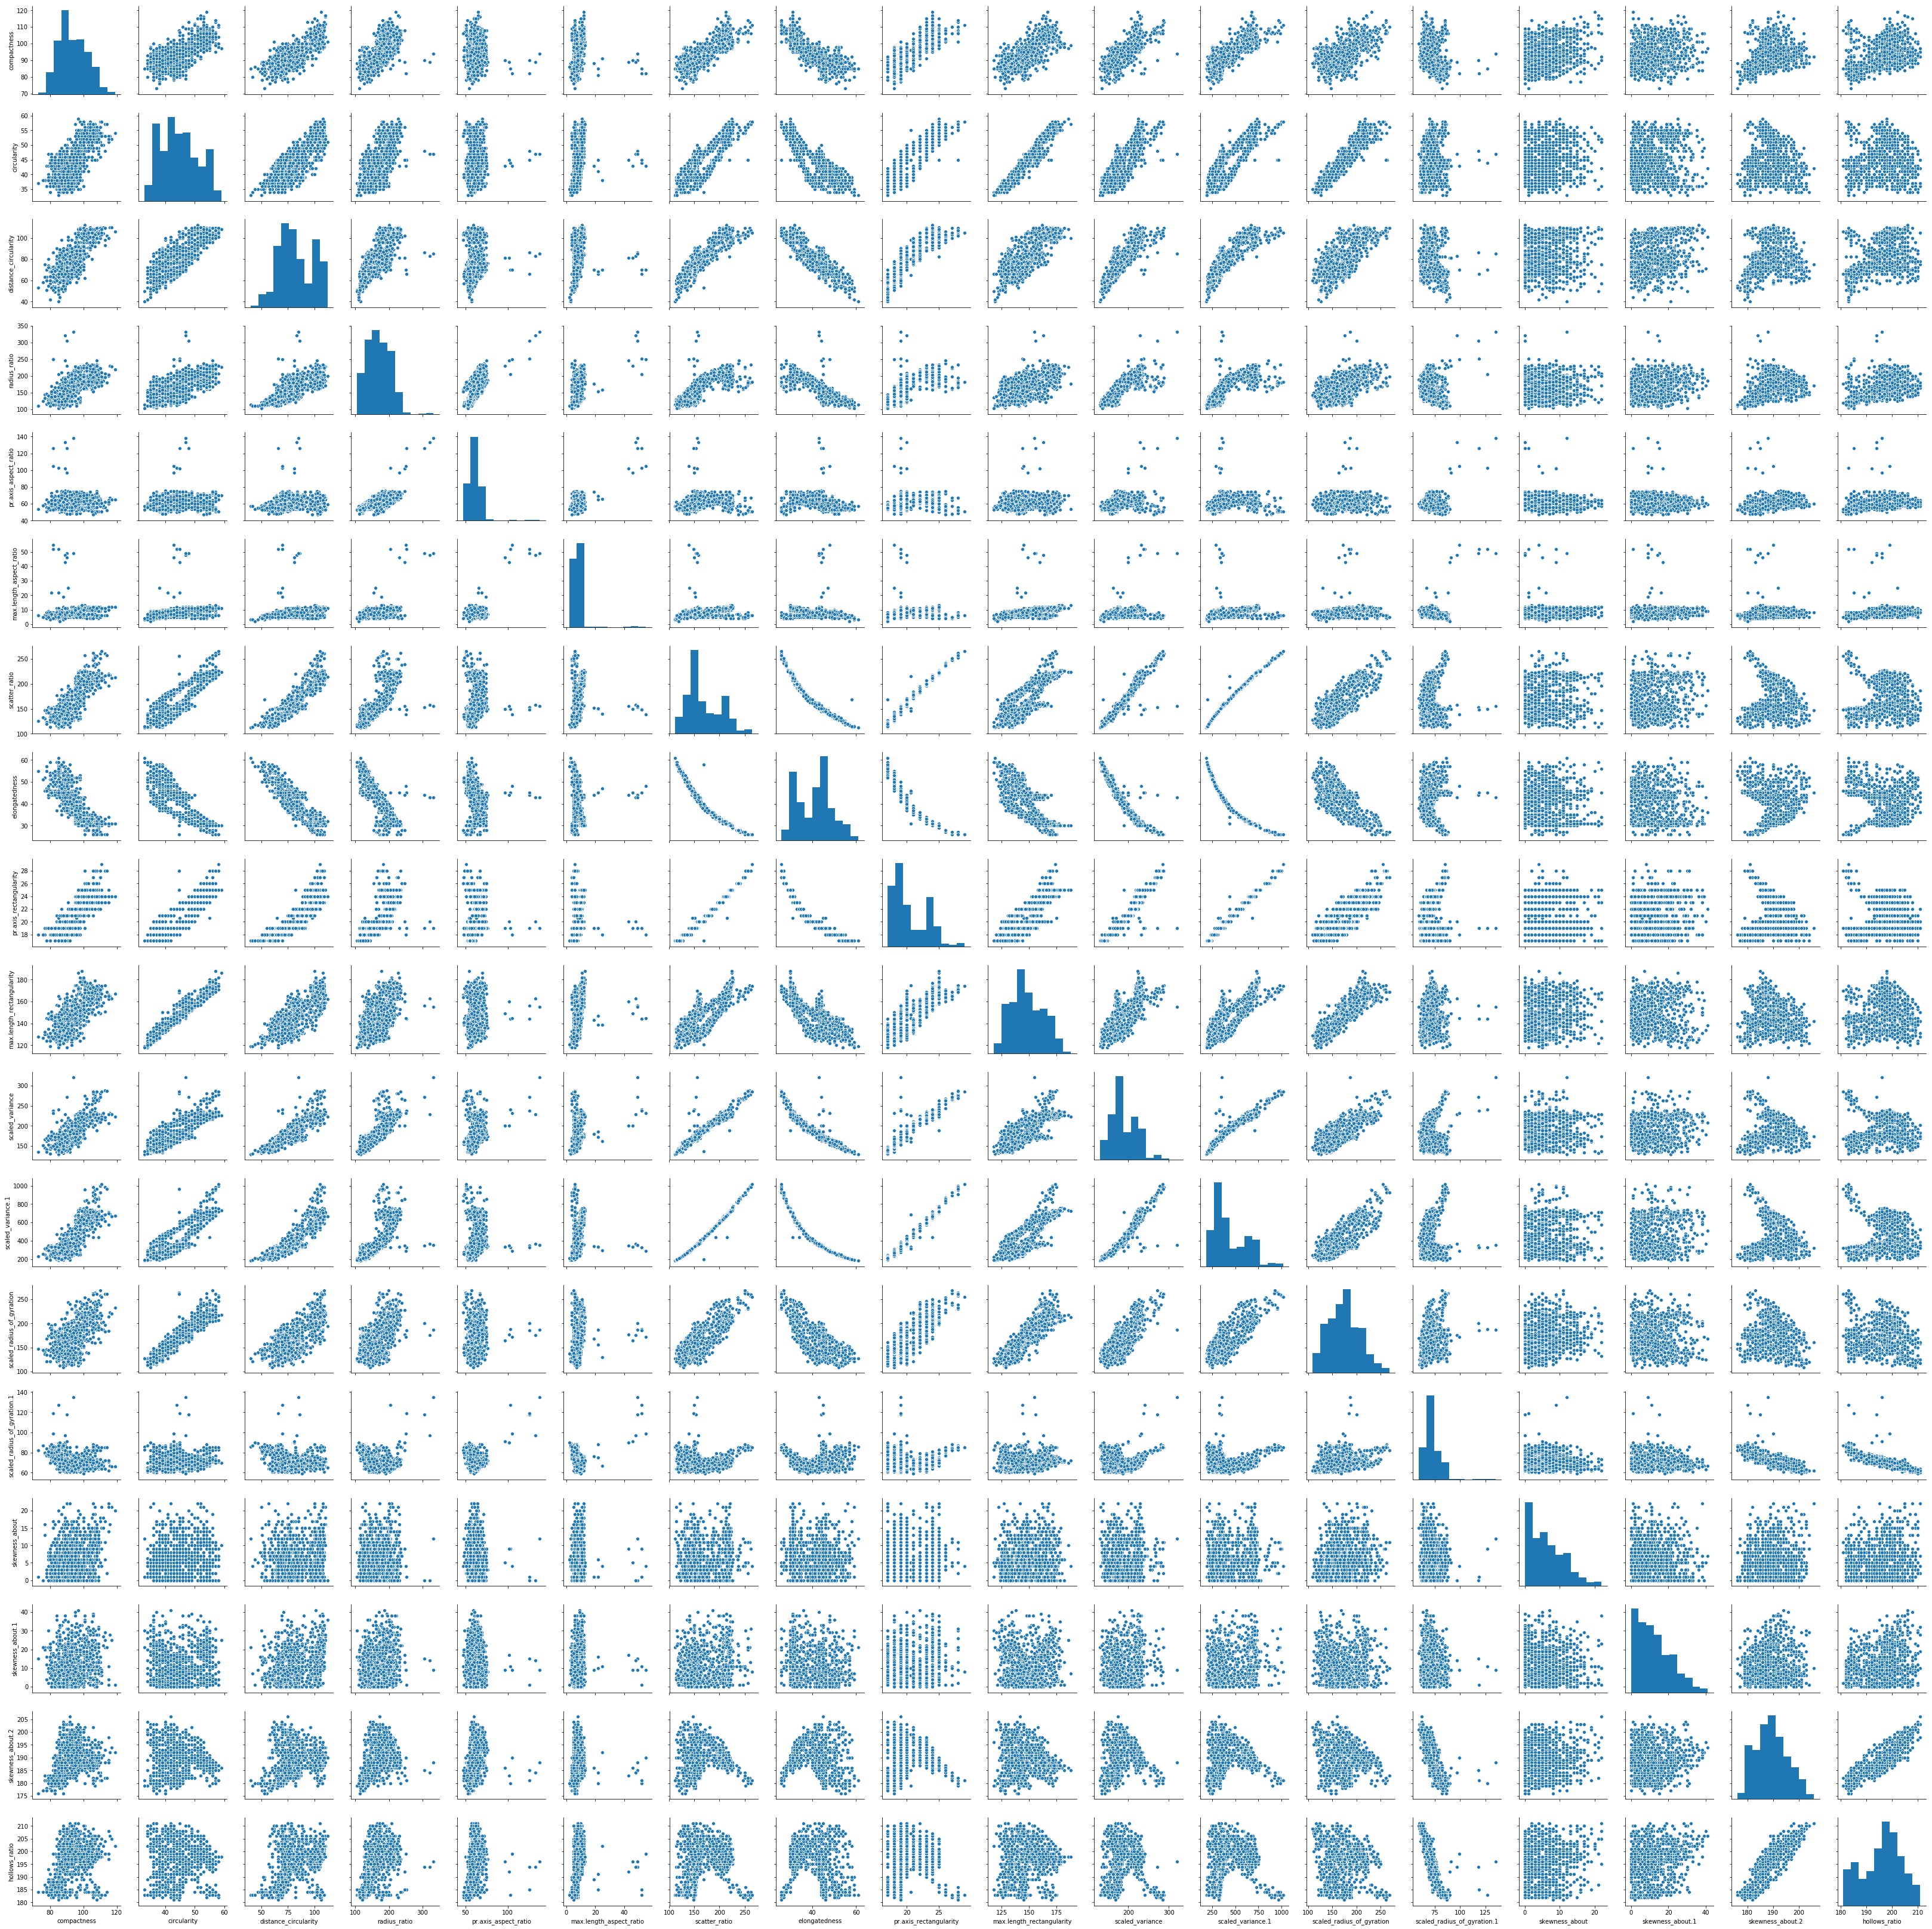

In [23]:
sns.pairplot(df)

In [24]:
## From the pair plot above we can conclude that nearly all of the features have very high relationship among them.

### PCA

In [25]:
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [26]:
## firstly scaling the features
Xscaled = df.apply(zscore)
Xscaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181


In [27]:
# Looking at the covariance matrix
covar = np.cov(Xscaled,rowvar=False)
covar
# hence we have 18x18 covariance matrix

array([[ 1.00118343,  0.68623251,  0.79084412,  0.69065619,  0.09181254,
         0.14842463,  0.81319623, -0.78957587,  0.81459888,  0.67694334,
         0.76367265,  0.81686705,  0.58584865, -0.25036693,  0.23596607,
         0.15757316,  0.2988797 ,  0.36598446],
       [ 0.68623251,  1.00118343,  0.79395399,  0.62170187,  0.15354334,
         0.25150523,  0.84921058, -0.82287347,  0.84597164,  0.96308094,
         0.7977645 ,  0.83951746,  0.92798524,  0.05270433,  0.14456452,
        -0.01186527, -0.1057698 ,  0.04537164],
       [ 0.79084412,  0.79395399,  1.00118343,  0.76798667,  0.15858456,
         0.26486339,  0.90547061, -0.91251368,  0.89418513,  0.77558624,
         0.86300031,  0.88837793,  0.70678835, -0.2261194 ,  0.1139479 ,
         0.26586756,  0.14573497,  0.3324884 ],
       [ 0.69065619,  0.62170187,  0.76798667,  1.00118343,  0.6643445 ,
         0.45056889,  0.73509724, -0.79072934,  0.70912305,  0.56987817,
         0.79498064,  0.72100219,  0.5371705 , -0.181

In [28]:
# Doing PCA on all the 18 dimensions
pca = PCA(n_components=18)
pca.fit(Xscaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [29]:
# The new eigen vectors
pca.components_
# here we got 18 eigen vectors each having 18 eigen values

array([[ 2.75259459e-01,  2.93392341e-01,  3.04556452e-01,
         2.67593206e-01,  8.04938998e-02,  9.72198560e-02,
         3.16872006e-01, -3.14042361e-01,  3.13953009e-01,
         2.82790417e-01,  3.09310530e-01,  3.14149034e-01,
         2.72002525e-01, -2.09179819e-02,  4.13316728e-02,
         5.83331566e-02,  3.01560495e-02,  7.40813666e-02],
       [-1.27010856e-01,  1.26217125e-01, -7.26862818e-02,
        -1.89635192e-01, -1.22158741e-01,  1.07277825e-02,
         4.80473095e-02,  1.27991503e-02,  6.00351423e-02,
         1.16182501e-01,  6.17536908e-02,  5.32757796e-02,
         2.09279660e-01,  4.88541866e-01, -5.49212020e-02,
        -1.24152855e-01, -5.40947666e-01, -5.40279812e-01],
       [-1.19874162e-01, -2.51835016e-02, -5.60058748e-02,
         2.75066087e-01,  6.42046458e-01,  5.91799912e-01,
        -9.76530949e-02,  5.74645766e-02, -1.09509169e-01,
        -1.69994013e-02,  5.64656174e-02, -1.08711428e-01,
        -3.13685232e-02,  2.86211092e-01, -1.15693651e

In [30]:
# % of variance for each eigen vector
pca.explained_variance_ratio_


array([5.22064851e-01, 1.67360538e-01, 1.05623824e-01, 6.54931979e-02,
       5.08938854e-02, 2.99245766e-02, 1.98968125e-02, 1.22999843e-02,
       8.88039031e-03, 5.08920430e-03, 3.69424950e-03, 2.55007565e-03,
       1.96447421e-03, 1.48211326e-03, 1.13027697e-03, 9.67822019e-04,
       5.12369772e-04, 1.71353806e-04])

### Depiction of % of variance contriubtion of each feature

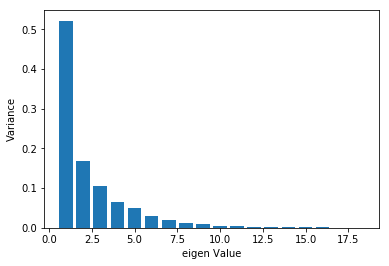

In [44]:
plt.bar(list(range(1,19,1)),pca.explained_variance_ratio_)
plt.ylabel('Variance')
plt.xlabel('eigen Value')
plt.show()

#### This is exactly as it was expected from the pair plot also, that:
 - All the features on the top of pair plot showed heavy relationships between them, hence the top 11-12 features on the graph above shows very less variance in their respective eigen values
 - The last 4 features as suggested by the pair plot and also from this graph (eigen values Vs Variance) indicates only the needful variance.
 - Nearly 10-11 features are nothing but redundant peice of information, which may lead to overfitting if we don't deal with it accordingly

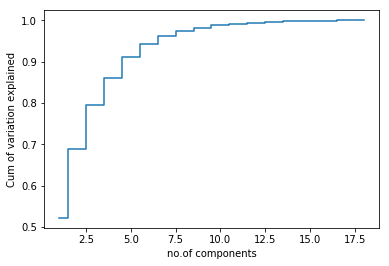

In [45]:
a = np.cumsum(pca.explained_variance_ratio_)

plt.step(list(range(1,19)),a, where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('no.of components')
plt.show()



### Dimensioanlity reduction

In [66]:
# Reducing to 3 dimensions
pca3 = PCA(n_components=3)
pca3.fit(Xscaled)

print 'PCA=3'
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(Xscaled)

# Reducing to 4 dimensions
pca4 = PCA(n_components=4)
pca4.fit(Xscaled)

print 'PCA=4'
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(Xscaled)

PCA=3
[0.52206485 0.16736054 0.10562382]
PCA=4
[0.52206485 0.16736054 0.10562382 0.0654932 ]


We can already see here that by reducing the dimesion to 4, the 4th dimension has not much to add (0.0654932). Hence, we can expect that the accuracy from these different number of dimensios would not affect the model accuracy much

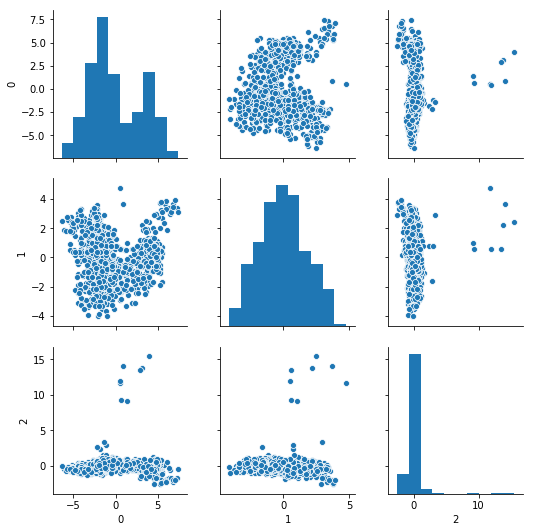

In [34]:
sns.pairplot(pd.DataFrame(Xpca3))

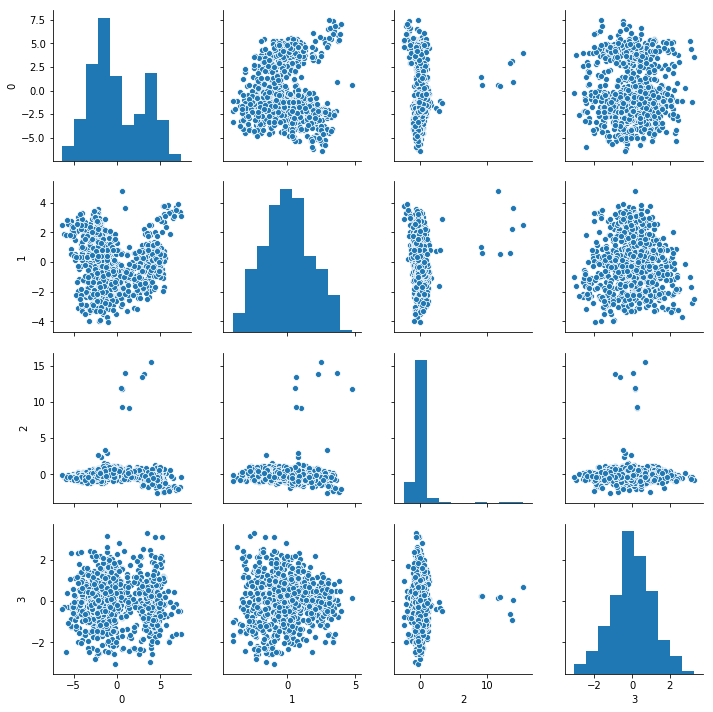

In [68]:
sns.pairplot(pd.DataFrame(Xpca4))

With total no. of components reduced to 3 and 4 we can see there is no clear relationship between the features now

### Fittting model

##### using SVM

In [90]:
# spliting training and test data
from sklearn.model_selection import train_test_split
Xscaled_train,Xscaled_test,y_train,y_test = train_test_split(Xscaled,target,test_size=0.3,random_state=7)
Xpca3_train,Xpca3_test,y_train,y_test = train_test_split(Xpca3,target,test_size=0.3,random_state=7)

Xpca4_train,Xpca4_test,y_train2,y_test2 = train_test_split(Xpca4,target,test_size=0.3,random_state=7)


In [36]:
from sklearn.svm import SVC
from sklearn import metrics

In [78]:
# SVM using all the features
svm = SVC()
svm.fit(Xscaled_train,y_train)
y_pred = svm.predict(Xscaled_test)
print 
print 'Confusion Metrics SVM: '
print metrics.confusion_matrix(y_test,y_pred)

acc_svm1 = metrics.accuracy_score(y_test,y_pred)
# providing labels and average as its a multiclass labeling
recall_svm1 =  metrics.recall_score(y_test,y_pred,average=None,labels=['car','bus','van'])
precision_svm1 = metrics.precision_score(y_test,y_pred,average=None,labels=['car','bus','van'])

# SVM using reedeuces features
#Changing the hyper parameter, C=0.01
c = [0.01,0.05,0.1,1]
acc_svm=[]
recall_svm = []
precision_svm = []
for i in c:
    svm1 = SVC(C=i)
    svm1.fit(Xpca3_train,y_train)
    y_pred1 = svm1.predict(Xpca3_test)
    print 
    print 'Confusion Metrics SVM for C= '+str(i)+': '
    print metrics.confusion_matrix(y_test,y_pred1)

    acc_svm.append(metrics.accuracy_score(y_test,y_pred1))
    # providing labels and average as its a multiclass labeling
    recall_svm.append(metrics.recall_score(y_test,y_pred1,average=None,labels=['car','bus','van']))
    precision_svm.append(metrics.precision_score(y_test,y_pred1,average=None,labels=['car','bus','van']))
print 'SVM Accuracy with all the features',acc_svm1
print 'SVM Accuracy with 3 features',acc_svm
print '\n\n'

print 'SVM recall for 3 lables with all the features',recall_svm1
print 'SVM recall for 3 lables with 3 features for best hyperparameter',recall_svm[-1]



Confusion Metrics SVM: 
[[ 64   1   1]
 [  0 125   2]
 [  0   1  60]]

Confusion Metrics SVM for C= 0.01: 
[[  0  66   0]
 [  0 127   0]
 [  0  61   0]]

Confusion Metrics SVM for C= 0.05: 
[[ 26  40   0]
 [  2 125   0]
 [  4  57   0]]

Confusion Metrics SVM for C= 0.1: 
[[ 40  23   3]
 [  3 123   1]
 [  6  27  28]]

Confusion Metrics SVM for C= 1: 
[[ 49  14   3]
 [  4 114   9]
 [  8  15  38]]
SVM Accuracy with all the features 0.9803149606299213
SVM Accuracy with 3 features [0.5, 0.594488188976378, 0.7519685039370079, 0.7913385826771654]



SVM recall for 3 lables with all the features [0.98425197 0.96969697 0.98360656]
SVM recall for 3 lables with 3 features for best hyperparameter [0.8976378  0.74242424 0.62295082]


/home/ankita/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ankita/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We can see here that the accuracy using all the features was 98% and recall of each label~0.96. But for reduced dimensiono the overall accuracy got reduced to 79% and  recall of each label varies widely too

#### using grid search with cross validation for SVM

In [38]:
from sklearn.model_selection import GridSearchCV

In [91]:
# Principal components = 3
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,0.05,0.5,1]}
scores = {'accuracy':metrics.accuracy_score}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5, scoring='recall_micro',refit='recall_micro')
clf.fit(Xpca3_train,y_train)
y_predCV = clf.predict(Xpca3_test)

# Principal components = 4
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01,0.05,0.5,1]}
scores = {'accuracy':metrics.accuracy_score}
svc1 = SVC()
clf1 = GridSearchCV(svc1, parameters, cv=5, scoring='recall_micro',refit='recall_micro')
clf1.fit(Xpca4_train,y_train2)
y_predCV2 = clf1.predict(Xpca4_test)

In [108]:
precision_svc3 = metrics.precision_score(y_test,y_predCV,labels=['car','bus','van'],average=None) # compnents = 3
precision_svc3

array([0.7972028 , 0.80327869, 0.76      ])

In [118]:
recall_svc3 =metrics.recall_score(y_test,y_predCV,labels=['car','bus','van'],average=None) # compnents = 3
recall_svc3

array([0.8976378 , 0.74242424, 0.62295082])

In [119]:
metrics.accuracy_score(y_test2,y_predCV2) # components =4

0.8070866141732284

In [120]:
precision_svc4 = metrics.precision_score(y_test2,y_predCV2,labels=['car','bus','van'],average=None) # compnents = 3
precision_svc4

array([0.85496183, 0.83928571, 0.68656716])

In [121]:
recall_svc4 = metrics.recall_score(y_test2,y_predCV2,labels=['car','bus','van'],average=None) # compnents = 3
recall_svc4

array([0.88188976, 0.71212121, 0.75409836])

We can see some improvement with components = 4

In [94]:
clf.best_estimator_ # Best estimator for components =3

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The above result shows that for SVM the best estimator comes out to be the one with C=1 and kernel='rbf'. This makes sense also as after PCA we tend to remove any feature that may have any linear relationship and using 'rbf' kernel will be beneficial for using PCA reduced feature dataset

In [99]:
svc3_acc = clf.best_score_  # This is the average accuracy score after 5 fold cross validation for compoenets =3
svc3_acc

0.7449324324324325

<text><font color='red'>Note: We can see there is a difference between the accuracy score of 5-fold cross validation and the normal accuracy score from the metrics library. This is because the former accuracy(Grid.best_score_) is the avg of each combination of the hyperparameter given.
    
This also suggests that the accuracy from one-fold may lead to overfitting</font></text>

In [96]:
clf1.best_estimator_ # Best estimator for components =4

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
clf1.best_score_  # This is the average accuracy score after 5 fold cross validation for compoenets =4

0.7736486486486487

#### Using Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

In [122]:
# With PCA reduced dimensions to 3
nv = GaussianNB()
nv.fit(Xpca3_train,y_train)
y_nv_pred = nv.predict(Xpca3_test)

acc_nb3 = metrics.accuracy_score(y_test,y_nv_pred)
# providing labels and average as its a multiclass labeling
recall_nb3 = (metrics.recall_score(y_test,y_nv_pred,average=None,labels=['car','bus','van']))
precision_nb3 = (metrics.precision_score(y_test,y_nv_pred,average=None,labels=['car','bus','van']))
print acc_nb3
print recall_nb3

# With PCA reduced dimensions to 4
nv2 = GaussianNB()
nv2.fit(Xpca4_train,y_train)
y_nv_pred2 = nv2.predict(Xpca4_test)

acc_nb4 = metrics.accuracy_score(y_test2,y_nv_pred2)
# providing labels and average as its a multiclass labeling
recall_nb4 = (metrics.recall_score(y_test2,y_nv_pred2,average=None,labels=['car','bus','van']))
precision_nb4 = (metrics.precision_score(y_test2,y_nv_pred2,average=None,labels=['car','bus','van']))
print acc_nb4
print recall_nb4

0.5984251968503937
[0.96062992 0.34848485 0.1147541 ]
0.5866141732283464
[0.91338583 0.36363636 0.14754098]


## Points of conclusions

With reduction in the dimension ,we could see that:
 - SVM performed better than Naiv Bayes with about 80% accuracy
 - Principal component = 4 has performed better than 3 although the 4th dimension that was added had a very less variance to contribute (about 0.065)
 - Although the accuracy decreased to 80% the recall still gives decent score for all the 3 labels [0.88188976, 0.71212121, 0.75409836] for car,bus,van repectively